In [51]:
import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D 
from keras.preprocessing.image import ImageDataGenerator

In [52]:
print(os.listdir('../input/flowers-recognition/flowers/flowers'))

['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']


In [53]:
# join path each image into arr fnames
base_path = '../input/flowers-recognition/flowers/flowers/'
categories = ['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

fnames = []
for category in categories:
    print(category)
    flower_folder = os.path.join(base_path, category)
    file_names = os.listdir(flower_folder)
    full_path = [os.path.join(flower_folder, file_name) for file_name in file_names]
    fnames.append(full_path)
    
    
print('length for each category : ', [len(f) for f in fnames])
#fname = np.array(fnames)
#print(fname.shape)
#print(fname)

dandelion
daisy
sunflower
tulip
rose
length for each category :  [1055, 769, 734, 984, 784]


In [54]:
# read image into arr images
images = []
for names in fnames:
    one_category_images = [cv2.imread(name) for name in names if(cv2.imread(name)) is not None]
    images.append(one_category_images)
    
print('number of images for each category : ', [len(f) for f in images])

number of images for each category :  [1052, 769, 734, 984, 784]


#test
img = np.array(images)
print(img.shape)
print(img.size)
for imgs in images:
    for img in imgs:
        print(img.size)
        
        

In [55]:
for i, imgs in enumerate(images):
    shapes = [img.shape for img in imgs]
    widths = [shape[0] for shape in shapes]
    heights = [shape[1] for shape in shapes]
    print('%d,%d is min shape for %s' % (np.min(widths),np.min(heights),categories[i]))

98,134 is min shape for dandelion
125,134 is min shape for daisy
134,152 is min shape for sunflower
134,134 is min shape for tulip
80,150 is min shape for rose


In [56]:
def cvtRGB(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

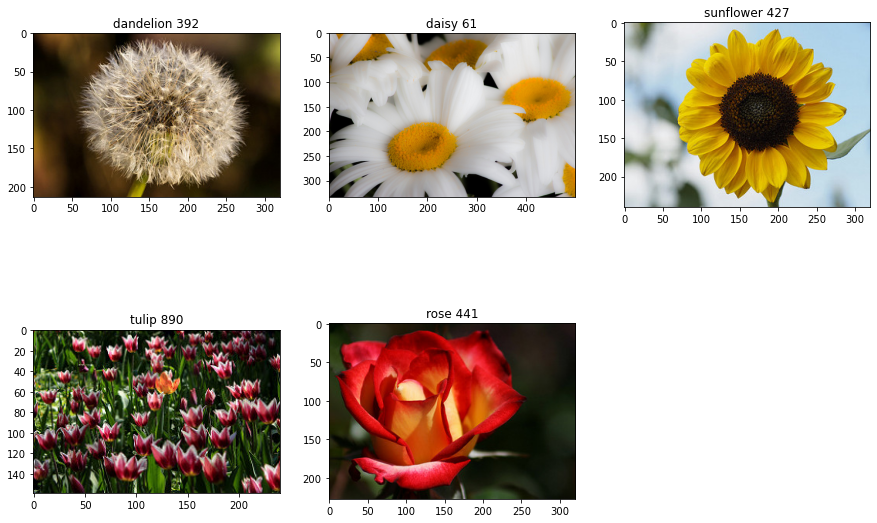

In [57]:
# show image
plt.figure(figsize=(15,10))
for i, imgs in enumerate(images):
    plt.subplot(2,3,i+1)
    idx = np.random.randint(len(imgs))
    plt.imshow(cvtRGB(imgs[idx]))
   # plt.grid(False)
    plt.title(categories[i]+' '+str(idx))
plt.show()

(240, 320, 3)
(224, 224, 3)


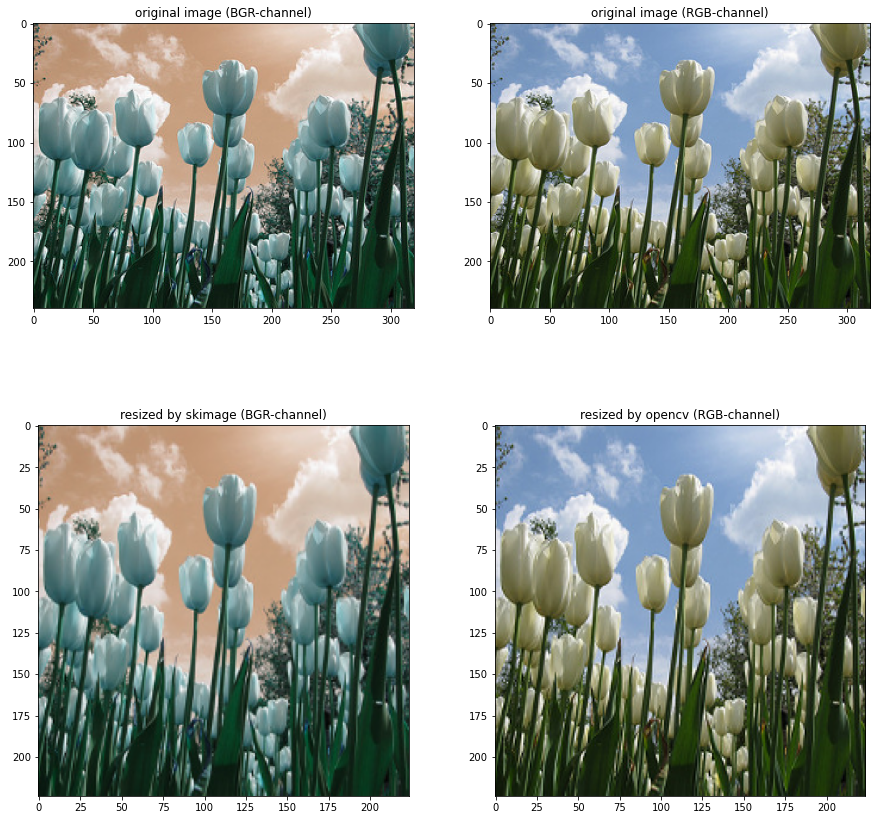

In [58]:
img_width, img_height = 224, 224

img = images[3][659]
print(img.shape)
resized_img = resize(img, (img_width, img_height, 3))
resized_img2 = cv2.resize(img,(img_width, img_height), interpolation = cv2.INTER_CUBIC)
print(resized_img.shape)
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('original image (BGR-channel)')
plt.grid(False)
plt.imshow(img)
plt.subplot(2,2,2)
plt.title('original image (RGB-channel)')
plt.grid(False)
plt.imshow(cvtRGB(img))
plt.subplot(2,2,3)
plt.title('resized by skimage (BGR-channel)')
plt.grid(False)
plt.imshow((resized_img))
plt.subplot(2,2,4)
plt.title('resized by opencv (RGB-channel)')
plt.grid(False)
plt.imshow(cvtRGB(resized_img2))
plt.show()

In [59]:
# Apply resize to all images
resized_images = []
for i,imgs in enumerate(images):
    resized_images.append([cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC) for img in imgs])

In [60]:
train_images = []
val_images = []
for imgs in resized_images:
    train, test = train_test_split(imgs, train_size=0.8, test_size=0.2)
    train_images.append(train)
    val_images.append(test)
#train_images = np.array(train_images)
#print(train_images)

In [61]:
len_train_images = [len(imgs) for imgs in train_images]
print(len_train_images)
print('sum of train images:', np.sum(len_train_images))
train_categories = np.zeros((np.sum(len_train_images)), dtype='uint8')
for i in range(5):
    if i is 0:
        train_categories[:len_train_images[i]] = i
    else:
        train_categories[np.sum(len_train_images[:i]):np.sum(len_train_images[:i+1])] = i
        
len_val_images = [len(imgs) for imgs in val_images]
print(len_val_images)
print('sum of val_images:', np.sum(len_val_images))
val_categories = np.zeros((np.sum(len_val_images)), dtype='uint8')
for i in range(5):
    if i is 0:
        val_categories[:len_val_images[i]] = i
    else:
        val_categories[np.sum(len_val_images[:i]):np.sum(len_val_images[:i+1])] = i

[841, 615, 587, 787, 627]
sum of train images: 3457
[211, 154, 147, 197, 157]
sum of val_images: 866


In [62]:
# cvt to arr
tmp_train_imgs = []
tmp_val_imgs = []
for imgs in train_images:
    tmp_train_imgs += imgs
for imgs in val_images:
    tmp_val_imgs += imgs
train_images = np.array(tmp_train_imgs)
val_images = np.array(tmp_val_imgs)

In [63]:
print('Before converting')
print('train data:', train_images.shape)
print('train labels:', train_categories.shape)

train_data = train_images.astype('float32')
val_data = val_images.astype('float32')
train_labels = np_utils.to_categorical(train_categories, len(categories))
val_labels = np_utils.to_categorical(val_categories, len(categories))
print()
print('After converting')
print('train data:', train_data.shape)
print('train labels:', train_labels.shape)

Before converting
train data: (3457, 224, 224, 3)
train labels: (3457,)

After converting
train data: (3457, 224, 224, 3)
train labels: (3457, 5)


In [64]:
seed = 100
np.random.seed(seed)
np.random.shuffle(train_data)
np.random.seed(seed)
np.random.shuffle(train_labels)
np.random.seed(seed)
np.random.shuffle(val_data)
np.random.seed(seed)
np.random.shuffle(val_labels)

In [65]:
train_data = train_data[:3400]
train_labels = train_labels[:3400]
val_data = val_data[:860]
val_labels = val_labels[:860]
print('shape of train data:', train_data.shape)
print('shape of train labels:', train_labels.shape)
print('shape of val data:', val_data.shape)
print('shape of val labels:', val_labels.shape)

shape of train data: (3400, 224, 224, 3)
shape of train labels: (3400, 5)
shape of val data: (860, 224, 224, 3)
shape of val labels: (860, 5)


In [66]:
batch_size = 32

In [67]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True
)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(
    rescale=1./255
)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow(
    train_data,
    train_labels,
    batch_size=batch_size
)

val_generator = val_datagen.flow(
    val_data,
    val_labels,
    batch_size=batch_size
)

In [68]:
from keras.applications.vgg19 import VGG19
from keras.optimizers import Adam
vgg19_model = VGG19()

model = Sequential()
for layer in vgg19_model.layers:
    model.add(layer)
    #print(layer.name)
model.layers.pop()
for layer in model.layers:
    layer.trainable = False
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(len(categories), activation='softmax'))
model.compile(Adam(lr=.00015), loss='categorical_crossentropy', metrics=['accuracy'])
for layer in model.layers: 
    print(layer.name)

block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool
flatten
fc1
fc2
predictions
batch_normalization_9
dense_9
batch_normalization_10
dense_10
batch_normalization_11
dense_11


In [ ]:
start = time.time()

model_scratch_info = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=len(train_data)/batch_size,   # -> 106 # images 3392 = steps * batch_size = 106 * 32 
    epochs=30,
    validation_steps=len(val_data)/batch_size, # -> 26 # images 832 = steps * batch_size = 26 * 32
    validation_data=val_generator,
    verbose=1
)

end = time.time()
duration = end - start

Epoch 1/30
107/106 [==============================] - 43s 398ms/step - loss: 1.3621 - accuracy: 0.5144 - val_loss: 1.6701 - val_accuracy: 0.1779
Epoch 2/30
107/106 [==============================] - 43s 399ms/step - loss: 1.0254 - accuracy: 0.6165 - val_loss: 1.7090 - val_accuracy: 0.1779
Epoch 3/30
107/106 [==============================] - 43s 397ms/step - loss: 0.9362 - accuracy: 0.6438 - val_loss: 1.6396 - val_accuracy: 0.1791
Epoch 4/30
107/106 [==============================] - 42s 393ms/step - loss: 0.9433 - accuracy: 0.6426 - val_loss: 1.5049 - val_accuracy: 0.3547
Epoch 5/30
107/106 [==============================] - 42s 389ms/step - loss: 0.8791 - accuracy: 0.6685 - val_loss: 1.1241 - val_accuracy: 0.5919
Epoch 6/30
107/106 [==============================] - 42s 393ms/step - loss: 0.8696 - accuracy: 0.6641 - val_loss: 0.8277 - val_accuracy: 0.6837
Epoch 7/30
107/106 [==============================] - 43s 404ms/step - loss: 0.8301 - accuracy: 0.6829 - val_loss: 0.7245 - val_ac

In [ ]:
print ('\n model_scratch took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, 30) )

In [ ]:
def return_name(label_arr):
  idx = np.where(label_arr == 1)
  return idx[0][0]

In [ ]:
def plot_model_history(model_name, history, epochs):
  
  print(model_name)
  plt.figure(figsize=(15, 5))
  
  # summarize history for accuracy
  plt.subplot(1, 2 ,1)
  plt.plot(np.arange(0, len(history['accuracy'])), history['accuracy'], 'r')
  plt.plot(np.arange(1, len(history['val_accuracy'])+1), history['val_accuracy'], 'g')
  plt.xticks(np.arange(0, epochs+1, epochs/10))
  plt.title('Training Accuracy vs. Validation Accuracy')
  plt.xlabel('Num of Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'validation'], loc='best')
  
  plt.subplot(1, 2, 2)
  plt.plot(np.arange(1, len(history['loss'])+1), history['loss'], 'r')
  plt.plot(np.arange(1, len(history['val_loss'])+1), history['val_loss'], 'g')
  plt.xticks(np.arange(0, epochs+1, epochs/10))
  plt.title('Training Loss vs. Validation Loss')
  plt.xlabel('Num of Epochs')
  plt.ylabel('Loss')
  plt.legend(['train', 'validation'], loc='best')
  
  
  plt.show()

In [ ]:
plot_model_history('model_scratch', model_scratch_info.history, 30)

In [ ]:
def predict_one_image(img, model):
  img = cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC)
  img = np.reshape(img, (1, img_width, img_height, 3))
  img = img/255.
  pred = model.predict(img)
  class_num = np.argmax(pred)
  return class_num, np.max(pred)


In [ ]:
test_img = cv2.imread('../input/flowers-recognition/flowers/rose/102501987_3cdb8e5394_n.jpg')
pred, probability = predict_one_image(test_img, model)
print('%s %d%%' % (categories[pred], round(probability, 10) * 100))
_, ax = plt.subplots(1)
plt.imshow(cvtRGB(test_img))
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.grid(False)
plt.show()

In [ ]:
def predict_val(val_data, model):
  val_input = np.reshape(val_data, (1, img_width, img_height, 3))
  val_input = val_input/255.
  pred = model.predict(val_input)
  class_num = np.argmax(pred)
  return class_num, np.max(pred)

In [ ]:
print("Model trained from scatch")
plt.figure(figsize=(15,15))
for i in range(9):
  
  idx = np.random.randint(860)
  
  ax = plt.subplot(3,3,i+1)
  plt.imshow(cvtRGB(val_data.astype('uint8')[idx]))
  category_idx = return_name(val_labels[idx])
  
  pred, prob = predict_val(val_data[idx], model)
  plt.title('True: %s || Predict: %s %d%%' % (categories[category_idx], categories[pred], round(prob, 2)*100))
  plt.grid(False)
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  
plt.show()

In [ ]:
#save model
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# save weights to HDF5  
model.save_weights("model.h5")
print("Saved model to disk")